# Question To Answer 
- How have the adjusted close prices of selected stocks (AAPL, MSFT, and GOOGL) trended over time?


## Objective 
- Analyze and visualize the performance of specific stocks.

## Methodology

- Filter for Specific Symbols
- Plot Price Trends for filtered symbol
- Calculate the average price trends by industry

In [ ]:
# Loading Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Loading merged datasets
df_merged = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Data_Analyst\S&P_500\sp500_data\cleaned_merged_stock_data.csv')

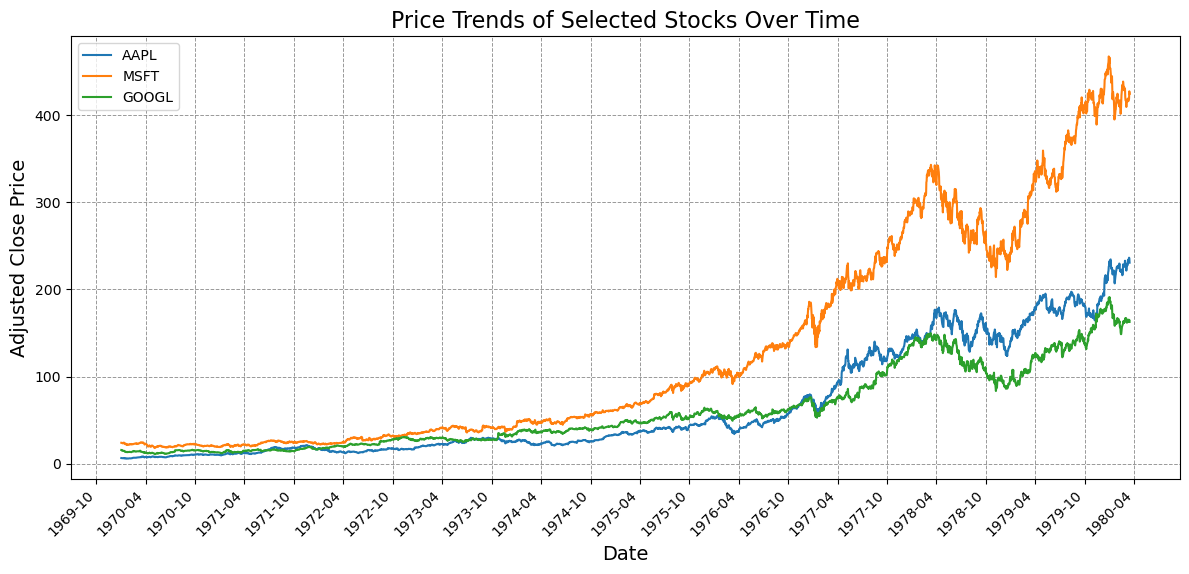

In [ ]:
# Filter for specific symbols
symbols = ['AAPL', 'MSFT', 'GOOGL']
stock_data = df_merged[df_merged['Symbol'].isin(symbols)]

# Plot Price Trends for filtered symbols
plt.figure(figsize=(12, 6))
for symbol in symbols:
    subset = stock_data[stock_data['Symbol'] == symbol]
    plt.plot(subset['Date'], subset['Adj Close'], label=symbol)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set title and labels
plt.title('Price Trends of Selected Stocks Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)

# Adjust legend position and size
plt.legend()

# Optimize layout to prevent overlap
plt.tight_layout()

# Add grid lines
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.8)

# Improve x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Display every 6th month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Show the plot
plt.show()


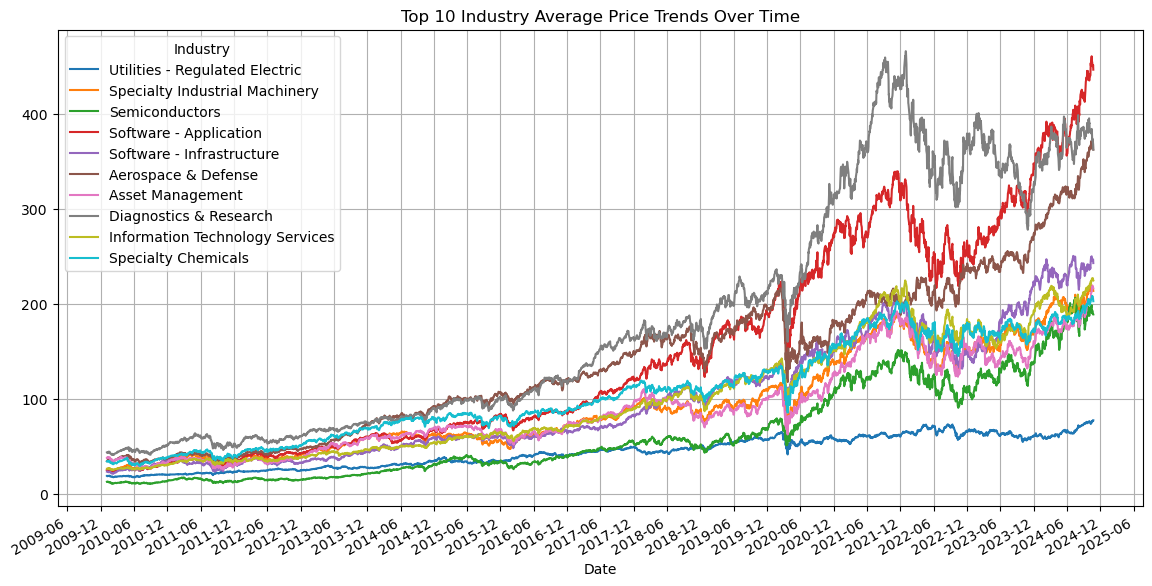

In [ ]:
# Calculate the average price trends of the top 10 industry

industry_trend = df_merged.groupby(['Date', 'Industry'])['Adj Close'].mean().unstack()
top_industries = df_merged['Industry'].value_counts().nlargest(10).index
industry_trend_top = industry_trend[top_industries]
industry_trend_top.plot(figsize=(14, 7), title="Top 10 Industry Average Price Trends Over Time")
plt.grid(True)
# Improve x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Display every 6th month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()